# **What is Backpropagation?**

Backpropagation is the algorithm used to:


*   Compute gradients of the loss with respect to model parameters (W and b)
*   Update those parameters using gradient descent

It works by applying chain rule in reverse through the computational graph (hence “back”-propagation).

Goal: Manually implement backpropagation for a simple 2-layer neural network, and understand how gradients are calculated and used to update weights.



# **Architecture to Implement**

We’ll build a 2-layer neural network from scratch (no PyTorch/TensorFlow):

**Architecture:**

Input (X) → [W1, b1] → Hidden Layer (a1) → [W2, b2] → Output (y_pred)

# **Imports and Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt



**Generate synthetic data:**

In [2]:
# Binary classification (label: 0 or 1)
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] * X[:, 1] > 0).astype(int).reshape(-1, 1)  # XOR-like


# **Network Hyperparameters**

In [3]:
input_size = 2      # 2 features
hidden_size = 4     # 4 hidden units
output_size = 1     # Binary output
learning_rate = 0.1


# **Weight Initialization**

In [4]:
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


# **Activation Functions**

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


# **Forward Pass**

In [6]:
# Forward pass
z1 = X @ W1 + b1           # (100, 4)
a1 = sigmoid(z1)           # (100, 4)

z2 = a1 @ W2 + b2          # (100, 1)
y_pred = sigmoid(z2)       # (100, 1)


# **Loss Function (Binary Cross-Entropy)**

In [8]:
def binary_cross_entropy(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))



# **Backward Pass (Backpropagation)**
**Derivatives:**

In [9]:
# dLoss/dz2
dz2 = y_pred - y           # (100, 1)

# Gradients for W2 and b2
dW2 = a1.T @ dz2           # (4, 1)
db2 = np.sum(dz2, axis=0, keepdims=True)

# Backprop to hidden layer
da1 = dz2 @ W2.T           # (100, 4)
dz1 = da1 * sigmoid_derivative(z1)

# Gradients for W1 and b1
dW1 = X.T @ dz1            # (2, 4)
db1 = np.sum(dz1, axis=0, keepdims=True)



# **Parameter Update**

In [10]:
W2 -= learning_rate * dW2
b2 -= learning_rate * db2

W1 -= learning_rate * dW1
b1 -= learning_rate * db1



# **Training Loop**

In [20]:
losses = []

for epoch in range(1000):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = sigmoid(z2)

    # Loss
    loss = binary_cross_entropy(y, y_pred)
    losses.append(loss)

    # Backward pass
    dz2 = y_pred - y
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = dz2 @ W2.T
    dz1 = da1 * sigmoid_derivative(z1)
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.0378
Epoch 100, Loss: 0.0318
Epoch 200, Loss: 0.0552
Epoch 300, Loss: 0.0451
Epoch 400, Loss: 0.0331
Epoch 500, Loss: 0.0221
Epoch 600, Loss: 0.1983
Epoch 700, Loss: 0.0950
Epoch 800, Loss: 0.0708
Epoch 900, Loss: 0.0586


# **Visualize Loss**

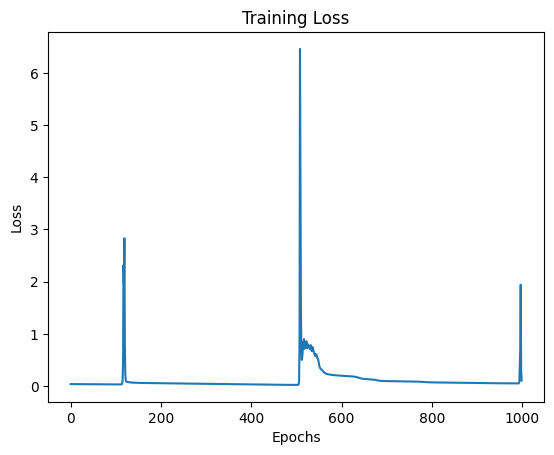

In [21]:
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
